In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
diabetes_data = pd.DataFrame(pd.read_csv('diabetes_prediction_dataset.csv'))
diabetes_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [45]:
row,cols = diabetes_data.shape
print(row,cols)

100000 9


In [46]:
diabetes_data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [47]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [48]:
diabetes_data['gender'] = diabetes_data['gender'].astype('category')
diabetes_data['smoking_history'] = diabetes_data['smoking_history'].astype('category')

In [49]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   gender               100000 non-null  category
 1   age                  100000 non-null  float64 
 2   hypertension         100000 non-null  int64   
 3   heart_disease        100000 non-null  int64   
 4   smoking_history      100000 non-null  category
 5   bmi                  100000 non-null  float64 
 6   HbA1c_level          100000 non-null  float64 
 7   blood_glucose_level  100000 non-null  int64   
 8   diabetes             100000 non-null  int64   
dtypes: category(2), float64(3), int64(4)
memory usage: 5.5 MB


In [50]:
diabetes_data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [51]:
#checking duplicate value
print("duplicate values :",diabetes_data.duplicated().sum())

duplicate values : 3854


In [52]:
# Remove duplicate rows
diabetes_data = diabetes_data.drop_duplicates()

# Verify that duplicates have been removed
print("Duplicate values after removal:", diabetes_data.duplicated().sum())

Duplicate values after removal: 0


In [53]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               96146 non-null  category
 1   age                  96146 non-null  float64 
 2   hypertension         96146 non-null  int64   
 3   heart_disease        96146 non-null  int64   
 4   smoking_history      96146 non-null  category
 5   bmi                  96146 non-null  float64 
 6   HbA1c_level          96146 non-null  float64 
 7   blood_glucose_level  96146 non-null  int64   
 8   diabetes             96146 non-null  int64   
dtypes: category(2), float64(3), int64(4)
memory usage: 6.1 MB


In [54]:
diabetes_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [55]:
print(len(set(diabetes_data['gender'])))
print(len(set(diabetes_data['smoking_history'])))

3
6


In [56]:
diabetes_data['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [57]:
diabetes_data = diabetes_data[diabetes_data['gender'] != 'other']
diabetes_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [58]:
#new_data = diabetes_data[['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level','diabetes']]

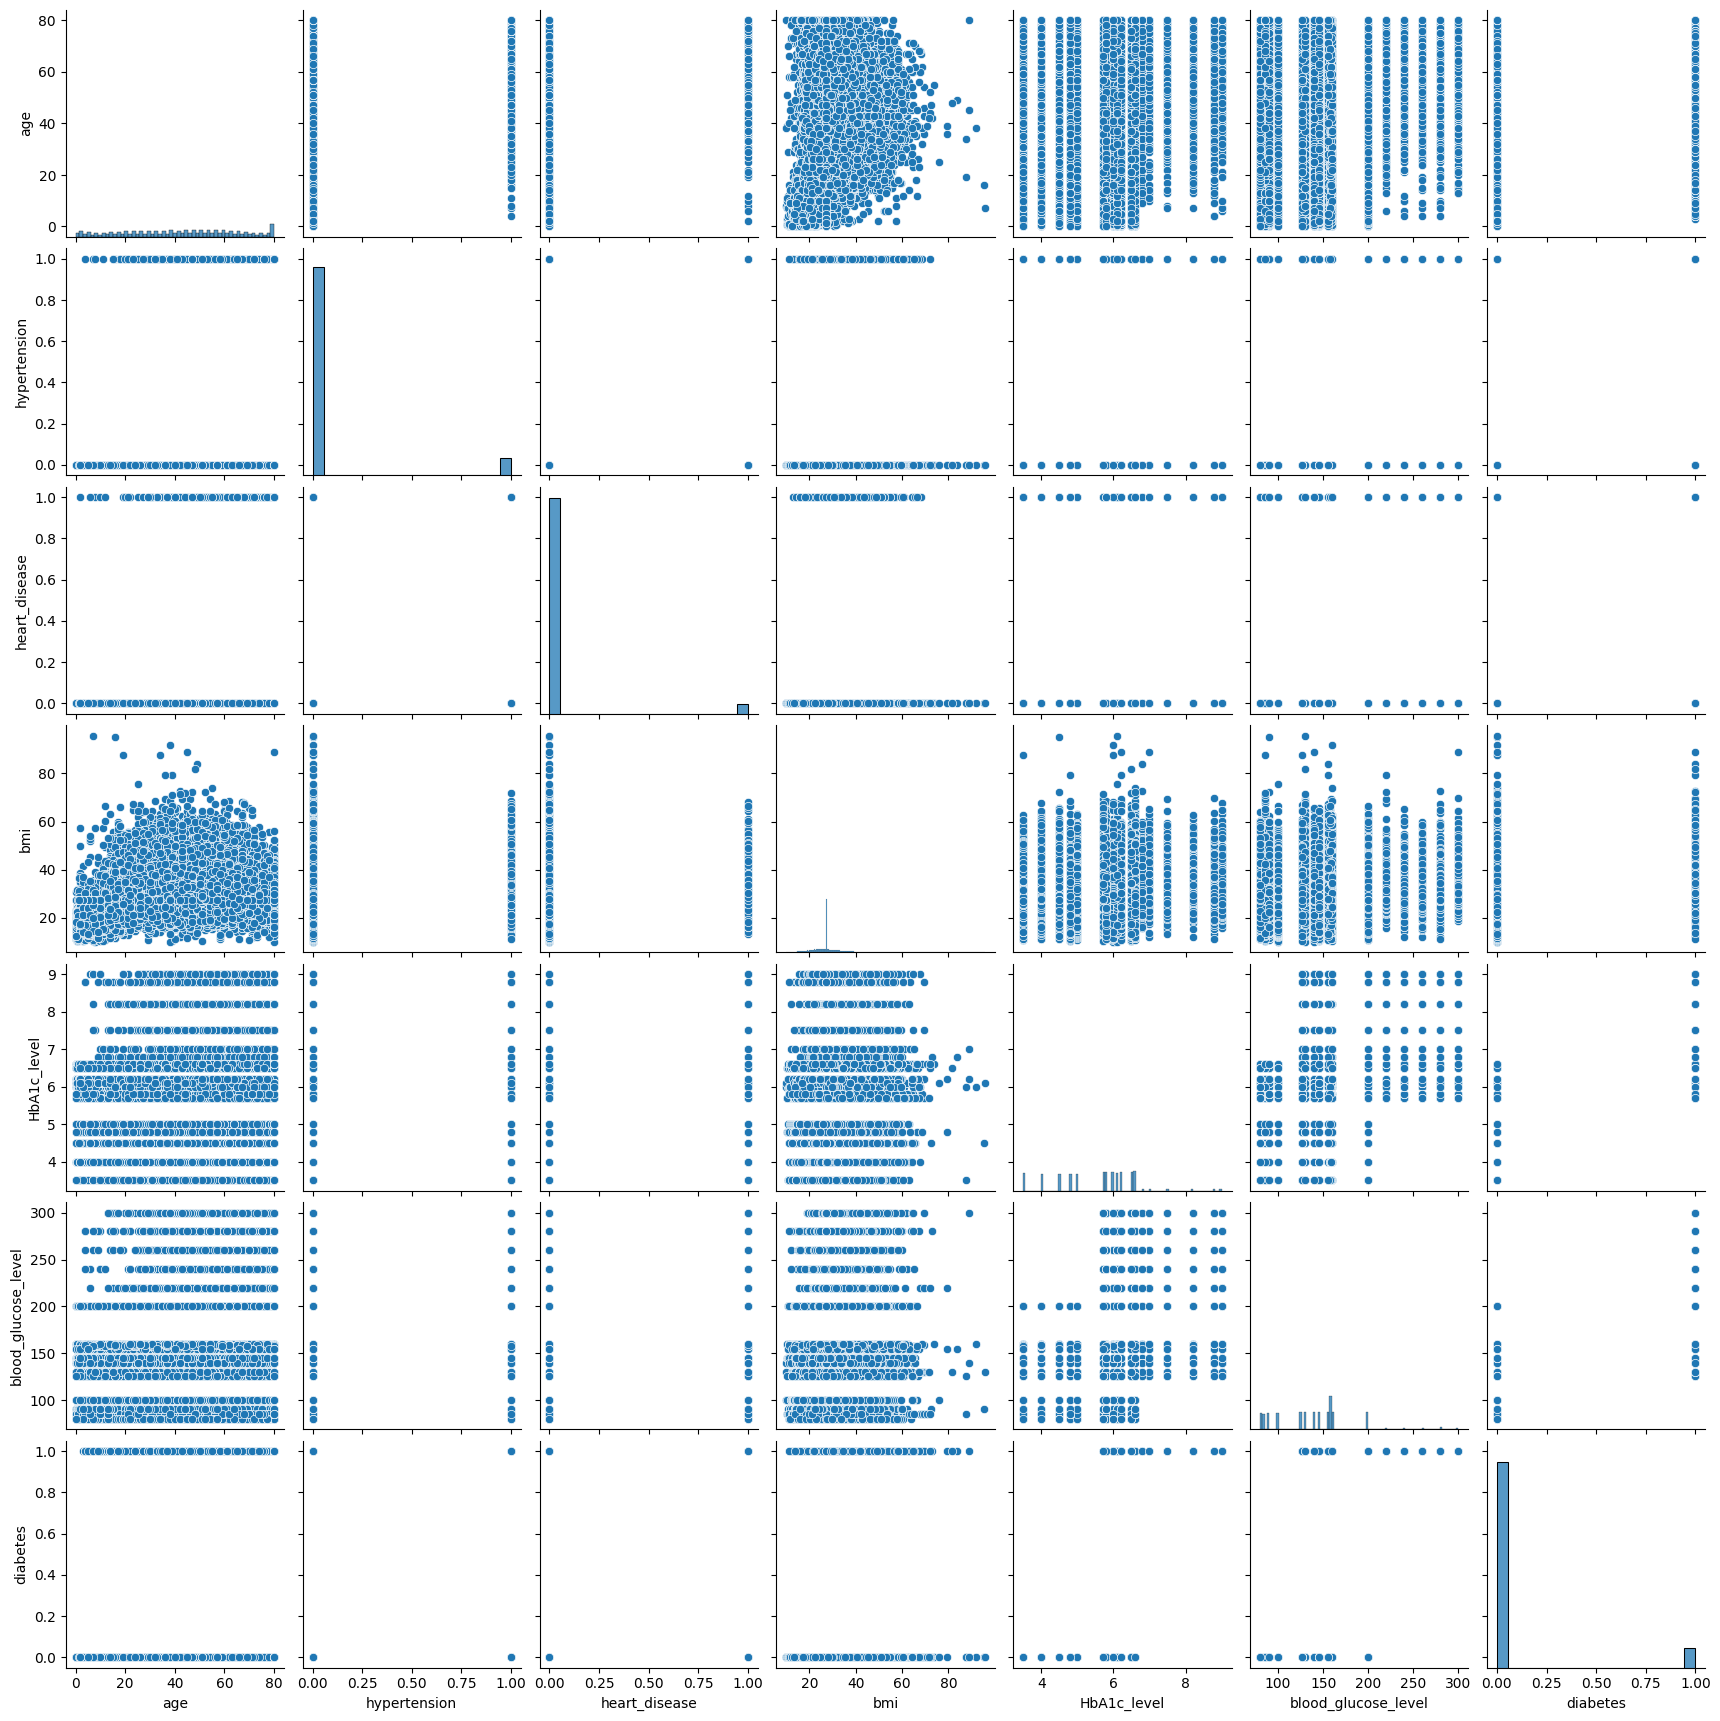

In [59]:
sns.pairplot(diabetes_data)

In [60]:
diabetes_data1=diabetes_data[['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level','diabetes']]
diabetes_data1.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.257305,0.238451,0.344797,0.106719,0.114317,0.264927
hypertension,0.257305,1.000000,0.119982,0.148111,0.081441,0.084834,0.195710
heart_disease,0.238451,0.119982,1.000000,0.061376,0.068140,0.070832,0.170711
bmi,0.344797,0.148111,0.061376,1.000000,0.084423,0.092543,0.214932
HbA1c_level,0.106719,0.081441,0.068140,0.084423,1.000000,0.171615,0.406408
blood_glucose_level,0.114317,0.084834,0.070832,0.092543,0.171615,1.000000,0.424336
diabetes,0.264927,0.195710,0.170711,0.214932,0.406408,0.424336,1.000000


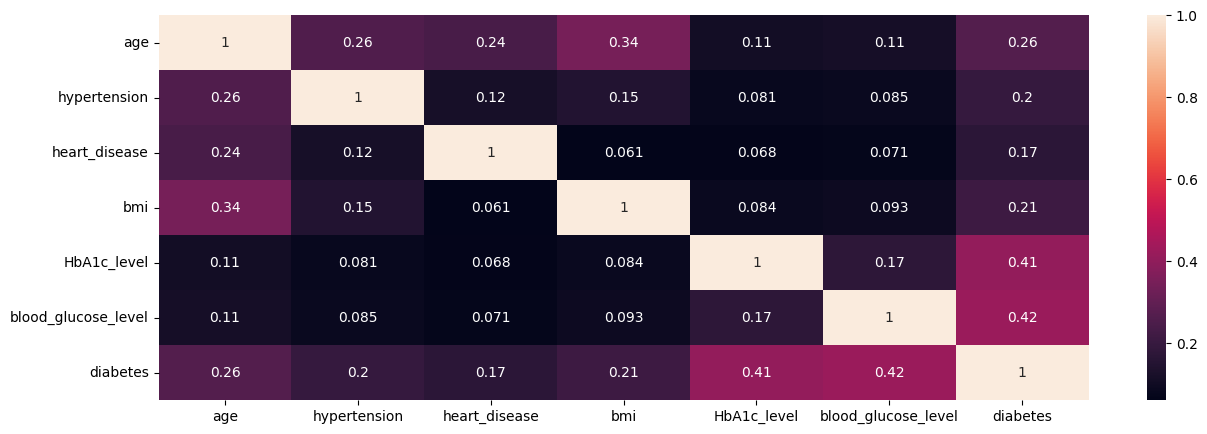

In [61]:
# Starting machine learning

plt.figure(figsize=(15,5))
sns.heatmap(diabetes_data1.corr(),annot=True)
plt.show()

In [62]:
diabetes_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [63]:
# Dimension reduction
gender = pd.get_dummies(diabetes_data['gender'],drop_first=True)
gender


,Male,Other
0,False,False
1,False,False
2,True,False
3,False,False
4,True,False
...,...,...
99994,False,False
99996,False,False
99997,True,False
99998,False,False


In [64]:
gender.drop('Other',axis=1,inplace=True)
gender

,Male
0,False
1,False
2,True
3,False
4,True
...,...
99994,False
99996,False
99997,True
99998,False


In [65]:
diabetes_data = pd.concat([diabetes_data, gender], axis = 1)
diabetes_data


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Male
0,Female,80.0,0,1,never,25.19,6.6,140,0,False
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,False
2,Male,28.0,0,0,never,27.32,5.7,158,0,True
3,Female,36.0,0,0,current,23.45,5.0,155,0,False
4,Male,76.0,1,1,current,20.14,4.8,155,0,True
...,...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0,False
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0,False
99997,Male,66.0,0,0,former,27.83,5.7,155,0,True
99998,Female,24.0,0,0,never,35.42,4.0,100,0,False


<Axes: xlabel='smoking_history', ylabel='Count'>

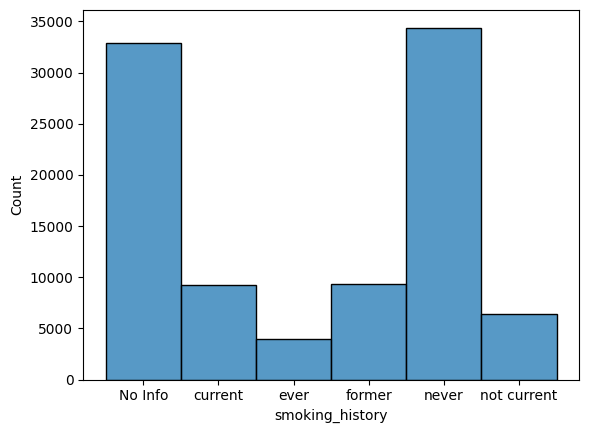

In [66]:
# plotting the variable for cleaning purpose
sns.histplot(diabetes_data['smoking_history'])

In [67]:
# no info doesnot hold any properties, so dropping the data
diabetes_data = diabetes_data.drop(diabetes_data[(diabetes_data.smoking_history == "No Info")].index)

In [68]:
#as we know that ever former and not current hold the similar properties so combine the properties together

diabetes_data['smoking_history'] = diabetes_data['smoking_history'].replace(['ever', 'not current','former'], 'former')

<Axes: xlabel='smoking_history', ylabel='Count'>

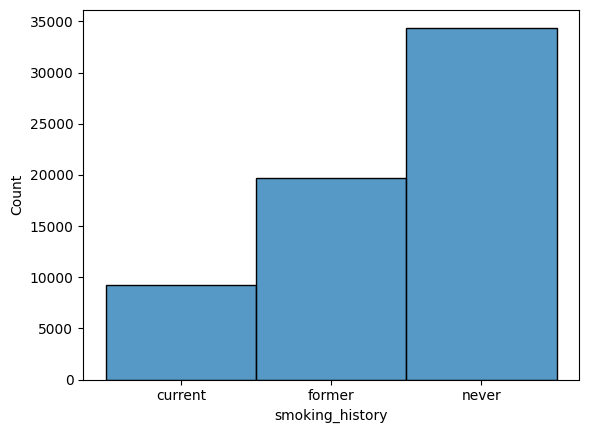

In [69]:
sns.histplot(diabetes_data['smoking_history'])

In [70]:
smoking_history = pd.get_dummies(diabetes_data['smoking_history'], drop_first= False)
smoking_history

,No Info,current,former,never
0,False,False,False,True
2,False,False,False,True
3,False,True,False,False
4,False,True,False,False
5,False,False,False,True
...,...,...,...,...
99992,False,False,False,True
99993,False,False,False,True
99997,False,False,True,False
99998,False,False,False,True


In [71]:
# cleaning the data by categorising the available data in simplified way
smoking_history.drop('No Info',axis=1,inplace=True)
smoking_history

,current,former,never
0,False,False,True
2,False,False,True
3,True,False,False
4,True,False,False
5,False,False,True
...,...,...,...
99992,False,False,True
99993,False,False,True
99997,False,True,False
99998,False,False,True


In [72]:
diabetes_data = pd.concat([diabetes_data, smoking_history], axis = 1)
diabetes_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Male,current,former,never
0,Female,80.0,0,1,never,25.19,6.6,140,0,False,False,False,True
2,Male,28.0,0,0,never,27.32,5.7,158,0,True,False,False,True
3,Female,36.0,0,0,current,23.45,5.0,155,0,False,True,False,False
4,Male,76.0,1,1,current,20.14,4.8,155,0,True,True,False,False
5,Female,20.0,0,0,never,27.32,6.6,85,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,Female,26.0,0,0,never,34.34,6.5,160,0,False,False,False,True
99993,Female,40.0,0,0,never,40.69,3.5,155,0,False,False,False,True
99997,Male,66.0,0,0,former,27.83,5.7,155,0,True,False,True,False
99998,Female,24.0,0,0,never,35.42,4.0,100,0,False,False,False,True


In [73]:
diabetes_data = diabetes_data.drop(['gender','smoking_history'],axis = 1)
diabetes_data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Male,current,former,never
0,80.0,0,1,25.19,6.6,140,0,False,False,False,True
2,28.0,0,0,27.32,5.7,158,0,True,False,False,True
3,36.0,0,0,23.45,5.0,155,0,False,True,False,False
4,76.0,1,1,20.14,4.8,155,0,True,True,False,False
5,20.0,0,0,27.32,6.6,85,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
99992,26.0,0,0,34.34,6.5,160,0,False,False,False,True
99993,40.0,0,0,40.69,3.5,155,0,False,False,False,True
99997,66.0,0,0,27.83,5.7,155,0,True,False,True,False
99998,24.0,0,0,35.42,4.0,100,0,False,False,False,True


In [74]:
diabetes_data.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Male,current,former,never
age,1.000000,0.253205,0.239489,0.162386,0.118019,0.117947,0.262481,0.022778,-0.051858,0.200767,-0.149863
hypertension,0.253205,1.000000,0.116703,0.129540,0.086996,0.087115,0.191552,0.027652,-0.011942,0.033715,-0.022878
heart_disease,0.239489,0.116703,1.000000,0.037289,0.072939,0.078933,0.169052,0.091992,-0.006206,0.091921,-0.081026
bmi,0.162386,0.129540,0.037289,1.000000,0.085025,0.095095,0.203939,0.010838,0.000196,0.057044,-0.053147
HbA1c_level,0.118019,0.086996,0.072939,0.085025,1.000000,0.196032,0.440889,0.029430,-0.005901,0.027281,-0.021175
blood_glucose_level,0.117947,0.087115,0.078933,0.095095,0.196032,1.000000,0.451332,0.030164,0.000317,0.024346,-0.022848
diabetes,0.262481,0.191552,0.169052,0.203939,0.440889,0.451332,1.000000,0.056523,-0.010709,0.061324,-0.049406
Male,0.022778,0.027652,0.091992,0.010838,0.029430,0.030164,0.056523,1.000000,0.049823,0.071557,-0.101754
current,-0.051858,-0.011942,-0.006206,0.000196,-0.005901,0.000317,-0.010709,0.049823,1.000000,-0.277009,-0.450285
former,0.200767,0.033715,0.091921,0.057044,0.027281,0.024346,0.061324,0.071557,-0.277009,1.000000,-0.733210


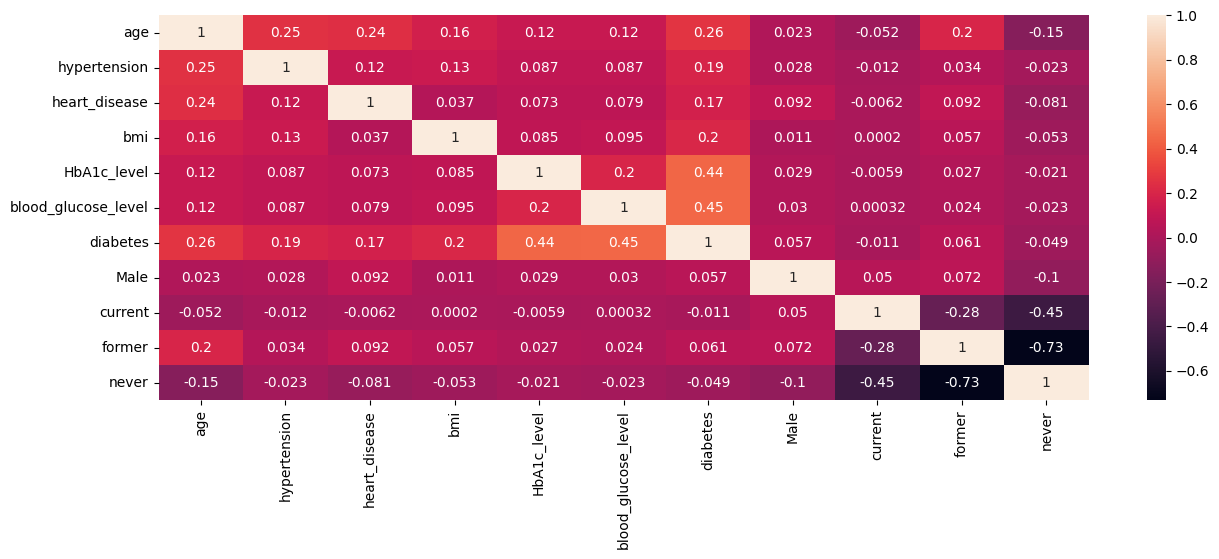

In [75]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(diabetes_data.corr(),annot=True)
plt.show()

In [76]:
# from sklearn.model_selection import train_test_split
# # We specify this so that the train and test data set always have the same rows, respectively
# diabetes_data_train, diabetes_data_test = train_test_split(diabetes_data, train_size = 0.8, test_size = 0.2, random_state = 1)

In [92]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
# Separate features and target variable
X = diabetes_data.drop(columns=['diabetes'])
y = diabetes_data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)  #setting maximum iteration limit to 1000
logreg_model=logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)



Accuracy: 0.949968384445147

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     11279
           1       0.86      0.64      0.74      1373

    accuracy                           0.95     12652
   macro avg       0.91      0.82      0.85     12652
weighted avg       0.95      0.95      0.95     12652


Confusion Matrix:
 [[11135   144]
 [  489   884]]


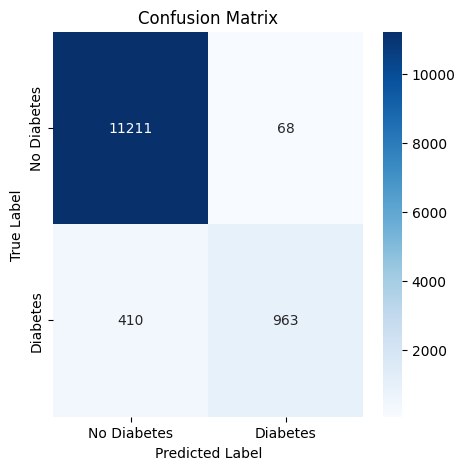

In [110]:
# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.9622194119506797

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     11279
           1       0.93      0.70      0.80      1373

    accuracy                           0.96     12652
   macro avg       0.95      0.85      0.89     12652
weighted avg       0.96      0.96      0.96     12652


Confusion Matrix:
 [[11211    68]
 [  410   963]]


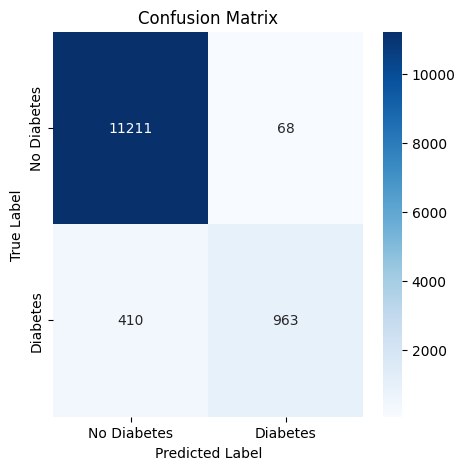

In [108]:
# Initialize and train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# evaluating the model we can conclude that random forest model is best fit for this dataset.